In [181]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [166]:
def sertsort(l):
    for k in range(len(l)):
        # print("k=",k)
        # elt = l[k]
        
        for j in range(k):
            # print("elt=",elt,"j=",j, "k-j-1=",k-j-1)
            if l[k-j]>=l[k-j-1]:
                break
            else:
                # print(l, "and",elt)
                # print(l[k-j], l[k-j-1])
                l[[k-j, k-j-1]] = l[[k-j-1, k-j]]
                # print(l[k-j], l[k-j-1])
                # print(l,"and",elt)
                # l[k-j-1] = elt
                # print(l)
                
                
    return(l)
            
    

In [167]:
l = np.random.randint(np.power(2,12),size=(np.power(2,12),1))
# print(l)
sertsort(l)

array([[   0],
       [   0],
       [   1],
       ...,
       [4093],
       [4094],
       [4094]])

In [160]:
def shellsort(l):

    n = len(l)

    iimax = np.floor(np.log(n-1)/np.log(3)).astype(int)
    iis = np.linspace(1,iimax,iimax)
    iis = np.flip(iis).astype(int)
    Qs = (0.5*(np.power(3,iis)-1)).astype(int)
    print(Qs)
    
    for q in Qs:
        # print(q)
        for m in range(q):
            for k in range(np.floor(len(l)/q).astype(int)):
                for j in range(k):
                    # print(k-j-q)
                    if l[q*(k-j)-m]>=l[q*(k-j-1)-m]:
                        break
                    else:
                        l[[q*(k-j)-m, q*(k-j-1)-m]] = l[[q*(k-j-1)-m, q*(k-j)-m]]

        # print(l)
                    
                    
    return(l.T)

In [161]:
l = np.random.randint(np.power(2,12),size=(np.power(2,12),1))
# print(l.T)
# print(np.sort(l,axis=None))
shellsort(l)

[1093  364  121   40   13    4    1]


array([[   0,    1,    1, ..., 4094, 4095, 4095]])

In [178]:
Tms = np.zeros((12,2))
for szs in range(2,14):
    l = np.random.randint(np.power(2,szs),size=(np.power(2,szs),1))
    Tms[szs-2,0] = timeit.timeit('sertsort(l)',globals=globals(), number=1)
    l = np.random.randint(np.power(2,szs),size=(np.power(2,szs),1))
    Tms[szs-2,1] = timeit.timeit('shellsort(l)',globals=globals(), number=1)
    

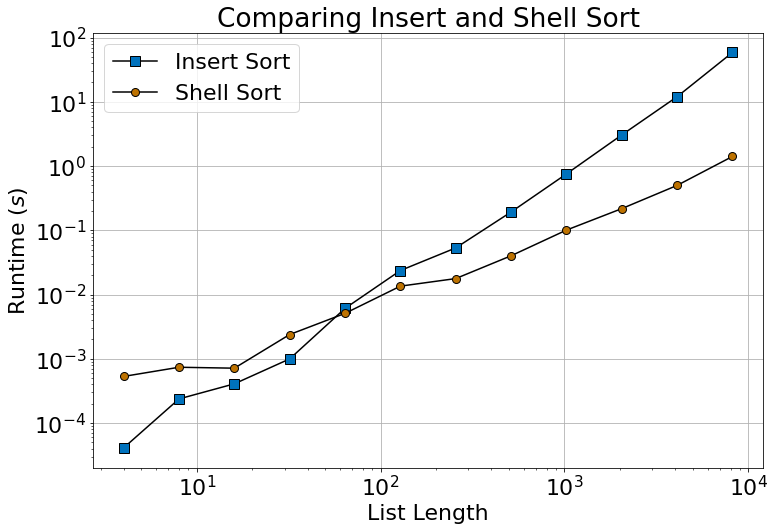

In [187]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12,8))

plt.loglog(np.power(2,np.linspace(2,13,12)),Tms[:,0], "-ks", label=r"Insert Sort", markersize = 10, markerfacecolor=(0,0.447,0.741,1))
plt.semilogy(np.power(2,np.linspace(2,13,12)),Tms[:,1], "-ko", label=r"Shell Sort", markersize = 8, markerfacecolor = (0.741,0.447,0,1))

plt.legend(loc="upper left")

plt.title(r"Comparing Insert and Shell Sort")
plt.xlabel(r"List Length")
plt.ylabel(r"Runtime $(s)$")
plt.grid()

In [179]:
Tms

array([[4.11599904e-05, 5.31990008e-04],
       [2.37575005e-04, 7.39034003e-04],
       [4.08007007e-04, 7.14737995e-04],
       [9.97480995e-04, 2.38867200e-03],
       [6.09592600e-03, 5.09718599e-03],
       [2.36678420e-02, 1.35191130e-02],
       [5.31787090e-02, 1.77335020e-02],
       [1.92638641e-01, 4.01402790e-02],
       [7.53680942e-01, 1.00733522e-01],
       [3.04843950e+00, 2.17435119e-01],
       [1.19952103e+01, 4.99752254e-01],
       [5.85796317e+01, 1.40956789e+00]])